# **MACHINE LEARNING PROJECT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import vstack
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [3]:
df = pd.read_csv('/content/drive/MyDrive/output_file.csv')

In [4]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
import torch

print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU Available: False


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU is available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.1
GPU is available: []


In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{"won't", 'theirs', 'about', "mightn't", 'aren', 'here', 'having', 'him', 'or', 'during', 'some', 'being', 'most', 'can', 'that', 'been', 'had', 'whom', 'be', "hasn't", 'than', "aren't", 'now', 'we', 'shouldn', 'all', 'herself', "haven't", 'and', 'was', 'why', "you'd", 'again', 'do', 'couldn', 'hasn', 'because', 'my', 'over', "you're", 'to', 'into', 'as', 'no', 'have', 'don', 'same', 'from', 'hadn', 'isn', "wasn't", 'at', 'through', 'yourselves', 'mightn', 'doesn', 'very', 'your', 'their', 'themselves', 'not', 'needn', 'shan', 't', 'against', 'am', 'what', 'is', 'd', 'o', "you'll", 'so', 'she', 'for', 'ours', "didn't", 'yourself', 'its', 'were', 'by', 'until', 'who', 'does', 're', "that'll", 'out', 'between', "shouldn't", 'few', 'more', 'too', "don't", 'wouldn', 'under', 'y', 'weren', 'll', 'there', 'them', 'won', "she's", 've', "hadn't", 'wasn', 'down', "doesn't", 'me', 'you', 'just', "should've", 'should', 'myself', 'm', 'only', "mustn't", 'which', 'other', 'the', 'haven', 'mustn', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df = df.dropna(subset=['short_description'])

In [7]:
df['headline'] = df['headline'].fillna('No Headline')

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
save_path = '/content/drive/My Drive/filled_data.csv'
df.to_csv(save_path, index=False)
print(f"File saved to {save_path}")

File saved to /content/drive/My Drive/filled_data.csv


In [10]:
df = pd.read_csv('/content/drive/MyDrive/filled_data.csv')

In [11]:
print(df.shape)

(189802, 6)


In [12]:
label_encoder = LabelEncoder()

df['Category_Numeric'] = label_encoder.fit_transform(df['category'])

In [13]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))
df['short_desc_length'] = df['short_description'].apply(lambda x: len(str(x).split()))

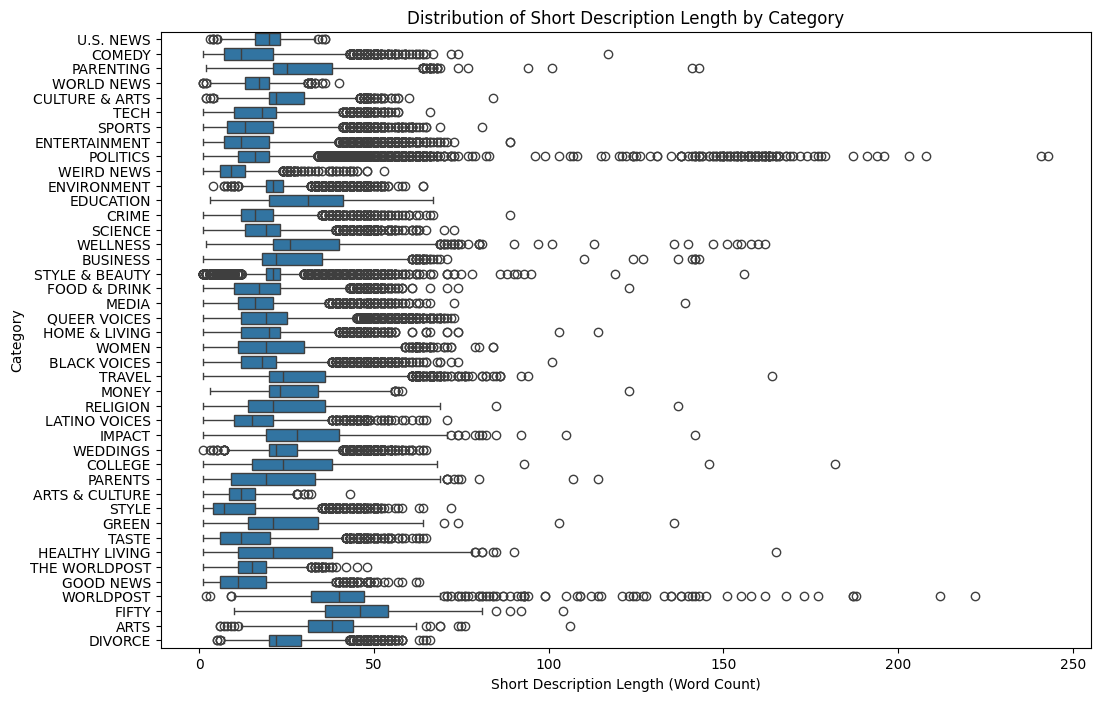

In [14]:
# Distribution of Short Description Length by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='short_desc_length', y='category', data=df)
plt.title('Distribution of Short Description Length by Category')
plt.xlabel('Short Description Length (Word Count)')
plt.ylabel('Category')
plt.show()

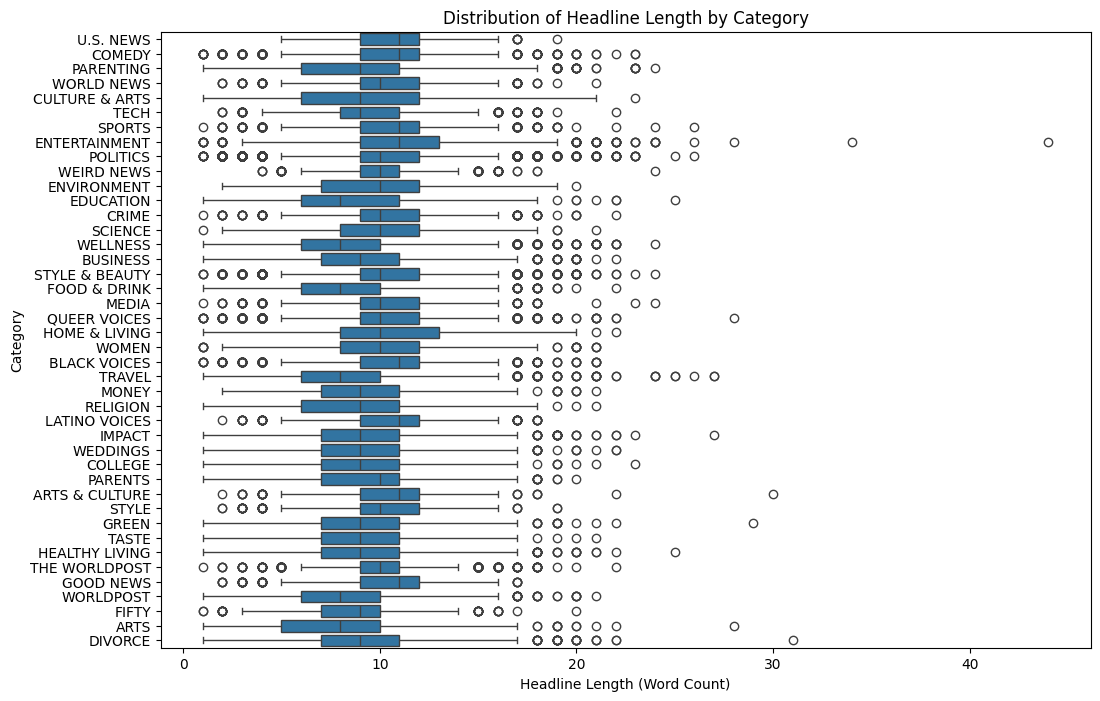

In [15]:
# Distribution of Short Description Length by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='headline_length', y='category', data=df)
plt.title('Distribution of Headline Length by Category')
plt.xlabel('Headline Length (Word Count)')
plt.ylabel('Category')
plt.show()

In [16]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    return [word for word in words if word not in stop_words]

In [17]:
df['short_description'] = df['short_description'].apply(preprocess_text)
df['headline'] = df['headline'].apply(preprocess_text)

In [18]:
df['clean_short_description'] = df['short_description'].apply(lambda x: ' '.join(x))
df['clean_headline'] = df['headline'].apply(lambda x: ' '.join(x))

In [19]:
df['combined_text'] = df['clean_short_description'] + ' ' + df['clean_headline']

In [20]:
# Create a dictionary to hold word counts per category
word_counts_combined = {}

# Count words in the 'short_description' for each category
for index, row in df.iterrows():
    category = row['category']
    words = row['combined_text']
    if category not in word_counts_combined:
        word_counts_combined[category] = Counter()

    word_counts_combined[category].update(words)

In [ ]:
# Prepare to plot histograms for words that appear more than three times
for category, counts in word_counts_combined.items():
    # Filter words that appear more than 3 times
    frequent_words = {word: count for word, count in counts.items() if count > 20}

    if frequent_words:  # Ensure there's at least one word to plot
        plt.figure(figsize=(15, 10))
        sns.barplot(x=list(frequent_words.values()), y=list(frequent_words.keys()), palette='viridis')
        plt.title(f'Word Frequency in Combined Text for Category: {category}')
        plt.xlabel('Word Count')
        plt.ylabel('Words')
        plt.show()

In [21]:
df = df.drop(['authors', 'link', 'date'], axis=1)

In [22]:
save_path = '/content/drive/My Drive/cleaned_data.csv'
df.to_csv(save_path, index=False)
print(f"File saved to {save_path}")

File saved to /content/drive/My Drive/cleaned_data.csv


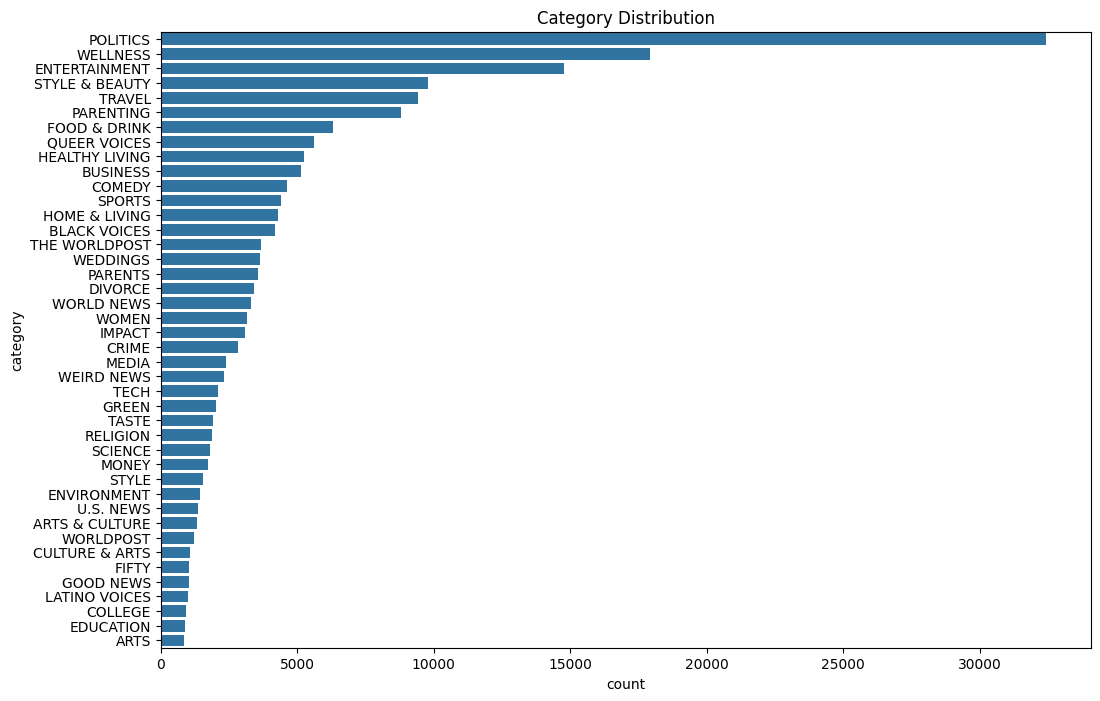

In [23]:

# Seeing Distribution of categories using a Histogram
plt.figure(figsize=(12, 8))
sns.countplot(y=df['category'], order=df['category'].value_counts().index)
plt.title('Category Distribution')
plt.show()


In [24]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

In [25]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    pos_tagged = pos_tag(word_tokenize(text))
    return [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tagged
    ]

In [26]:
df['combined_text'] = df['combined_text'].fillna('').astype(str)
df['text'] = df['combined_text'].apply(lemmatize_text)
df['combined_text'] = df['text'].apply(lambda x: ' '.join(x))


In [27]:
save_path = '/content/drive/My Drive/lemmetized_combined_data.csv'
df.to_csv(save_path, index=False)
print(f"File saved to {save_path}")

File saved to /content/drive/My Drive/lemmetized_combined_data.csv


In [28]:
df = pd.read_csv('/content/drive/MyDrive/lemmetized_combined_data.csv')

In [29]:
print(df.head())

                                            headline   category  \
0  ['4', 'million', 'americans', 'roll', 'sleeves...  U.S. NEWS   
1  ['american', 'airlines', 'flyer', 'charged', '...  U.S. NEWS   
2  ['23', 'funniest', 'tweets', 'cats', 'dogs', '...     COMEDY   
3  ['funniest', 'tweets', 'parents', 'week', 'sep...  PARENTING   
4  ['woman', 'called', 'cops', 'black', 'birdwatc...  U.S. NEWS   

                                   short_description  Category_Numeric  \
0  ['health', 'experts', 'said', 'early', 'predic...                35   
1  ['subdued', 'passengers', 'crew', 'fled', 'bac...                35   
2    ['dog', 'dont', 'understand', 'could', 'eaten']                 5   
3  ['accidentally', 'put', 'grownup', 'toothpaste...                22   
4  ['amy', 'cooper', 'accused', 'investment', 'fi...                35   

   headline_length  short_desc_length  \
0               11                 29   
1               13                 28   
2               13           

In [ ]:
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')

tfidf.fit(df['combined_text'])

TfidfVectorizer(max_features=10000, stop_words='english')

In [ ]:
batch_size = 5000

def process_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

In [ ]:
sparse_batches = []
dense_batches= []

for batch in process_batches(df['combined_text'], batch_size):
    batch_tfidf = tfidf.transform(batch)
    sparse_batches.append(batch_tfidf)

In [ ]:
X_text_sparse = vstack(sparse_batches)


In [ ]:
df['word_count'] = df['combined_text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
mean_length_by_category = df.groupby('category')['word_count'].mean()
df['mean_word_count_by_category'] = df['category'].map(mean_length_by_category)


In [ ]:
scaler = MinMaxScaler()
mean_word_count_scaled = scaler.fit_transform(df[['mean_word_count_by_category']])
X_combined = hstack([X_text_sparse, mean_word_count_scaled])

In [ ]:
y = df['Category_Numeric']

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2,stratify=y ,random_state=42
)

In [ ]:
print(df.head(10))

In [ ]:
k = 8000
select_kbest = SelectKBest(score_func=chi2, k=k)

X_train_selected = select_kbest.fit_transform(X_train, y_train)
X_test_selected = select_kbest.transform(X_test)


# **Logistic Regression**

In [ ]:
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga' , class_weight='balanced')
clf.fit(X_train_selected, y_train)
y_pred_encoded = clf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred_encoded))
print("Classification Report:\n", classification_report(y_test, y_pred_encoded))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your test set y_test and predicted labels y_pred
# y_pred = model.predict(X_test_selected)  # Make predictions on the test set

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_encoded)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print the confusion matrix
print("Confusion Matrix:")
print(cm)


In [ ]:
class_counts = pd.Series(y_test).value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
Category_Numeric
24    6488
38    3588
10    2955
30    1960
34    1884
22    1758
13    1266
25    1121
16    1053
3     1027
5      929
28     883
17     864
2      835
33     733
36     731
23     711
8      685
40     659
39     637
18     617
6      566
20     481
37     463
32     420
15     409
31     388
26     376
27     361
21     351
29     313
11     288
35     275
1      268
41     248
7      213
12     208
14     208
19     204
4      184
9      180
0      173
Name: count, dtype: int64


In [ ]:
# Check the class distribution in training and test sets
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("Class distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)


Class distribution in training set:
Category_Numeric
24    17.091563
38     9.451993
10     7.783800
30     5.162637
34     4.963745
22     4.631160
13     3.335726
25     2.951772
16     2.773954
3      2.703486
5      2.445321
28     2.325459
17     2.274089
2      2.200987
33     1.930309
36     1.924381
23     1.873670
8      1.805178
40     1.737344
39     1.676754
18     1.626043
6      1.492351
20     1.266456
37     1.220356
32     1.105762
15     1.078101
31     1.022122
26     0.989851
27     0.949678
21     0.924651
29     0.825864
11     0.759347
35     0.725759
1      0.705343
41     0.654632
7      0.559796
12     0.549259
14     0.547283
19     0.538721
4      0.485376
9      0.475497
0      0.454423
Name: proportion, dtype: float64
Class distribution in test set:
Category_Numeric
24    17.091225
38     9.451806
10     7.784305
30     5.163194
34     4.962988
22     4.631069
13     3.335002
25     2.953031
16     2.773900
3      2.705408
5      2.447248
28     2.326071
1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Or any other classifier

# Define different values of max_features to test
max_features_list = [5000, 10000, 15000, 20000]

# Store results
results = {}

# Loop through each value of max_features
for max_features in max_features_list:
    tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_tfidf = tfidf.fit_transform(df['combined_text'])  # Assuming 'combined_text' is your text column

    # Use a classifier (e.g., RandomForest) and cross-validation to evaluate the performance
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    cv_scores = cross_val_score(model, X_tfidf, df['Category_Numeric'], cv=5)  # Assuming 'target' is the label column

    # Store the mean cross-validation score for this value of max_features
    results[max_features] = cv_scores.mean()

# Print results for each max_features value
for max_features, score in results.items():
    print(f"Max Features: {max_features}, CV Score: {score}")


In [ ]:
print(df['category'].value_counts())

category
POLITICS          32440
WELLNESS          17940
ENTERTAINMENT     14774
STYLE & BEAUTY     9799
TRAVEL             9421
PARENTING          8790
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
WORLD NEWS         3297
WOMEN              3183
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2099
GREEN              2046
TASTE              1940
RELIGION           1879
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1441
U.S. NEWS          1377
ARTS & CULTURE     1339
WORLDPOST          1242
CULTURE & ARTS     1063
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS   

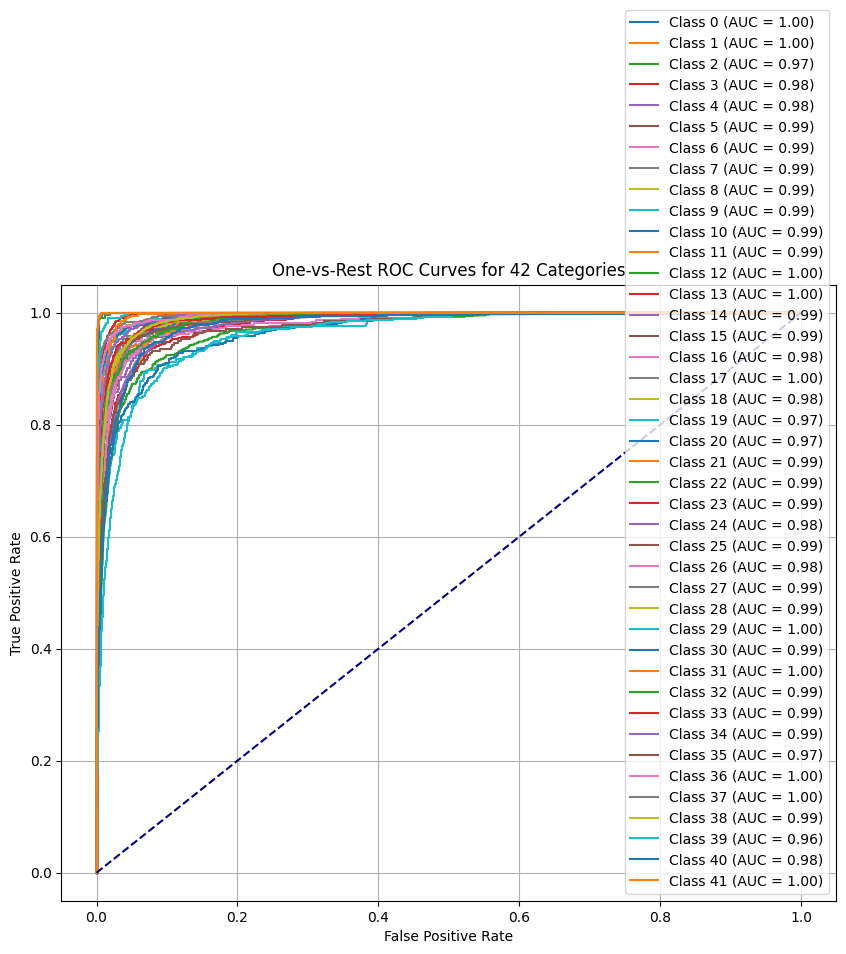

ROC-AUC per class: {0: 0.9995296240480049, 1: 0.9950315411507976, 2: 0.9692338213192748, 3: 0.9790310978149976, 4: 0.9847700349073684, 5: 0.9865907726852359, 6: 0.9853572570925327, 7: 0.9897667059188162, 8: 0.9940983925000567, 9: 0.9946225174911552, 10: 0.9870650552242771, 11: 0.9852499911519302, 12: 0.9995297113423487, 13: 0.9971535136463918, 14: 0.9919620498829437, 15: 0.9891091525049406, 16: 0.9832897044070775, 17: 0.9958335891691351, 18: 0.9817532453103235, 19: 0.9681110943198691, 20: 0.9674960672025773, 21: 0.9876696732320236, 22: 0.9857270516396968, 23: 0.9898898800252974, 24: 0.979098930549478, 25: 0.9878175363047378, 26: 0.982097600049816, 27: 0.9873599487239936, 28: 0.9894234168402725, 29: 0.9987518482964443, 30: 0.9938961446082282, 31: 0.9951663853814745, 32: 0.9869868626175065, 33: 0.9903337803654072, 34: 0.993011924188809, 35: 0.9747960419350326, 36: 0.9953197357499303, 37: 0.9997634431071746, 38: 0.9899810852682104, 39: 0.9617634000336818, 40: 0.9781157104351645, 41: 0.999

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_pred_proba = clf.predict_proba(X_test_selected)  # Get predicted probabilities

# Binarize the labels for One-vs-Rest
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))  # Convert y_test to binary matrix
n_classes = y_test_binarized.shape[1]  # Get number of classes

# Initialize the plot
plt.figure(figsize=(10, 8))

# Loop through each class and calculate the ROC-AUC score
for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])  # Compute ROC curve for class i
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])  # Compute AUC for class i

    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.title('One-vs-Rest ROC Curves for 42 Categories')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Optionally, print out the ROC-AUC score for each class
roc_auc_dict = {}
for i in range(n_classes):
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])  # Compute AUC for each class
    roc_auc_dict[i] = roc_auc

print("ROC-AUC per class:", roc_auc_dict)


In [ ]:

# Create a dictionary to map numeric category labels to their category names
category_mapping = dict(zip(df['Category_Numeric'], df['category']))

# If there are duplicate numeric labels, you can store the categories as a list
category_mapping_multiple = {}
for index, row in df.iterrows():
    numeric_label = row['Category_Numeric']
    category_name = row['category']
    if numeric_label not in category_mapping_multiple:
        category_mapping_multiple[numeric_label] = []
    category_mapping_multiple[numeric_label].append(category_name)

# Now print the mapping for all numeric categories
print("Mapping of numeric categories to category names:")
for numeric_label, categories in category_mapping_multiple.items():
    print(f"Numeric Label {numeric_label}: {', '.join(set(categories))} :")


Mapping of numeric categories to category names:
Numeric Label 35: U.S. NEWS
Numeric Label 5: COMEDY
Numeric Label 22: PARENTING
Numeric Label 40: WORLD NEWS
Numeric Label 7: CULTURE & ARTS
Numeric Label 32: TECH
Numeric Label 28: SPORTS
Numeric Label 10: ENTERTAINMENT
Numeric Label 24: POLITICS
Numeric Label 37: WEIRD NEWS
Numeric Label 11: ENVIRONMENT
Numeric Label 9: EDUCATION
Numeric Label 6: CRIME
Numeric Label 27: SCIENCE
Numeric Label 38: WELLNESS
Numeric Label 3: BUSINESS
Numeric Label 30: STYLE & BEAUTY
Numeric Label 13: FOOD & DRINK
Numeric Label 20: MEDIA
Numeric Label 25: QUEER VOICES
Numeric Label 17: HOME & LIVING
Numeric Label 39: WOMEN
Numeric Label 2: BLACK VOICES
Numeric Label 34: TRAVEL
Numeric Label 21: MONEY
Numeric Label 26: RELIGION
Numeric Label 19: LATINO VOICES
Numeric Label 18: IMPACT
Numeric Label 36: WEDDINGS
Numeric Label 4: COLLEGE
Numeric Label 23: PARENTS
Numeric Label 1: ARTS & CULTURE
Numeric Label 29: STYLE
Numeric Label 15: GREEN
Numeric Label 31: T

# **Random Forest W/ Tuned**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_selected, y_train)
y_pred_rf = rf_clf.predict(X_test_selected)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


# **Random Forest With Tuning**

In [ ]:
param_dist = {
    'n_estimators': [200, 100, 150],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
}

rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='recall'
)

In [ ]:
random_search.fit(X_train_selected, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

best_rf_clf = random_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test_selected)

print("Random Forest Accuracy (after tuning):", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report (after tuning):\n", classification_report(y_test, y_pred_rf))


# **SVM with Linear Kernel**

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# **SVM with RBF Kernel**

In [ ]:
n_components = 50
svd = TruncatedSVD(n_components=n_components, random_state=42)

X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

print(svd.explained_variance_ratio_.sum())

0.09265918687860786


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)


In [ ]:
svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_model.fit(X_train_scaled, y_train)

# y_pred = svm_rbf_model.predict(X_test_scaled)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
y_pred_train = svm_rbf_model.predict(X_train_scaled)
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))